<b>Data mining project - 2020/21</b><br>
<b>Author</b>: [Alexandra Bradan](https://github.com/alexandrabradan)<br>
<b>Python version</b>: 3.x<br>
<b>Last update: 07/01/2021<b>

In [39]:
%matplotlib inline

# general libraries
import sys
import math
import operator
import itertools
import pydotplus
import collections
import missingno as msno
from pylab import MaxNLocator
from collections import Counter
from collections import OrderedDict

from collections import defaultdict
from IPython.display import Image

# pandas libraries
import pandas as pd
from pandas import DataFrame
from pandas.testing import assert_frame_equal

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# numpy libraries
import numpy as np
from numpy import std
from numpy import mean
from numpy import arange
from numpy import unique
from numpy import argmax
from numpy import percentile

# scipy libraries
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import normaltest

# sklearn libraries
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer  # explicitly require this experimental feature
from sklearn.impute import IterativeImputer

from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.pipeline import make_pipeline as imbmake_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, recall_score, precision_score, classification_report, roc_auc_score 

In [40]:
from fim import apriori

In [41]:
data_directory = "../../../data/"
TR_impunted_file = data_directory + "Impunted_Train_HR_Employee_Attrition.csv"
TS_impunted_file = data_directory + "Impunted_Test_HR_Employee_Attrition.csv"
TR_not_impunted = data_directory + "Not_Impunted_Train_HR_Employee_Attrition.csv"
TS_not_impunted = data_directory + "Cleaned_Test_HR_Employee_Attrition.csv"

<h6>Impunted TR Dataframe</h6>

In [42]:
df_impunted = pd.read_csv(TR_impunted_file, sep=",") 
df_impunted.shape

(883, 30)

In [43]:
to_drop = ["MaritalStatus", "EducationField", "Department", "YearsSinceLastPromotion", "HourlyRate", "MonthlyRate"]

# drop features 
for column_name in to_drop:
    del df_impunted[column_name]
    
# check dropping output
print(df_impunted.shape)

(883, 24)


In [44]:
df_impunted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       883 non-null    int64  
 1   Attrition                 883 non-null    object 
 2   BusinessTravel            883 non-null    object 
 3   DistanceFromHome          883 non-null    int64  
 4   Education                 883 non-null    int64  
 5   EnvironmentSatisfaction   883 non-null    int64  
 6   Gender                    883 non-null    object 
 7   JobInvolvement            883 non-null    int64  
 8   JobLevel                  883 non-null    int64  
 9   JobRole                   883 non-null    object 
 10  JobSatisfaction           883 non-null    int64  
 11  MonthlyIncome             883 non-null    int64  
 12  NumCompaniesWorked        883 non-null    int64  
 13  OverTime                  883 non-null    object 
 14  PercentSal

<h6>Not-impunted TR DataFrame</h6>

In [45]:
df_not_impunted = pd.read_csv(TR_not_impunted, sep=",") 
df_not_impunted.shape

(883, 30)

In [46]:
to_drop = ["MaritalStatus", "EducationField", "Department", "YearsSinceLastPromotion", "HourlyRate", "MonthlyRate"]

# drop features 
for column_name in to_drop:
    del df_not_impunted[column_name]
    
# check dropping output
print(df_not_impunted.shape)

(883, 24)


<h6> Impunted TS DataFrame </h6>

In [47]:
df_ts = pd.read_csv(TS_impunted_file, sep=",") 
df_ts.shape

(219, 24)

In [48]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       219 non-null    int64  
 1   Attrition                 219 non-null    object 
 2   BusinessTravel            219 non-null    object 
 3   DistanceFromHome          219 non-null    int64  
 4   Education                 219 non-null    int64  
 5   EnvironmentSatisfaction   219 non-null    int64  
 6   Gender                    219 non-null    object 
 7   JobInvolvement            219 non-null    int64  
 8   JobLevel                  219 non-null    int64  
 9   JobRole                   219 non-null    object 
 10  JobSatisfaction           219 non-null    int64  
 11  MonthlyIncome             219 non-null    int64  
 12  NumCompaniesWorked        219 non-null    int64  
 13  OverTime                  219 non-null    object 
 14  PercentSal

<h6> Not-impnted TS DataFrame </h6>

In [49]:
df_ts_not_impunted = pd.read_csv(TS_not_impunted, sep=",") 
df_ts_not_impunted.shape

del df_ts_not_impunted["Department"]
del df_ts_not_impunted["MonthlyRate"]


to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["YearsAtCompany"] > 20]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["YearsInCurrentRole"] > 16]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["MonthlyHours"] > 590.9767441860465]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

df_ts_not_impunted.shape

dropped rows = 	8
dropped rows = 	2
dropped rows = 	7


(219, 24)

In [50]:
df_ts_not_impunted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       191 non-null    float64
 1   Attrition                 219 non-null    object 
 2   BusinessTravel            202 non-null    object 
 3   DistanceFromHome          219 non-null    int64  
 4   Education                 219 non-null    int64  
 5   EnvironmentSatisfaction   219 non-null    int64  
 6   Gender                    208 non-null    object 
 7   JobInvolvement            219 non-null    int64  
 8   JobLevel                  219 non-null    int64  
 9   JobRole                   219 non-null    object 
 10  JobSatisfaction           219 non-null    int64  
 11  MonthlyIncome             168 non-null    float64
 12  NumCompaniesWorked        219 non-null    int64  
 13  OverTime                  219 non-null    object 
 14  PercentSal

<h2> Continuos variables discretisation with K-Means</h2>
K-Means => similar bins' size => IBM's Age and opportunity equity 

In [51]:
df_converted = df_impunted.copy()
df_ts_conv = df_ts.copy()

In [52]:
def print_performed_encoding(column_name, train_encoded):
    column_index = df_impunted.columns.get_loc(column_name)
    encoding_info = {}
    for enc, i in zip(train_encoded, range(0, len(train_encoded))):
        try:
            tmp_list = encoding_info[str(enc)]
            tmp_list.append(df_impunted.iloc[i, column_index])
            encoding_info[str(enc)] = tmp_list
        except KeyError:
            encoding_info[str(enc)] = [df_impunted.iloc[i, column_index]]
            
    for key, value in encoding_info.items():
        min_value = min(value)
        max_value = max(value)
        print(column_name, key, "[%s-%s]" %(min_value, max_value),sep="\t")

In [53]:
cont_variables = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike",
                 "YearsAtCompany", "YearsInCurrentRole", "TaxRate", "MonthlyHours", "OverallSatisfaction"]

for column_name in cont_variables:
    discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans').fit(df_converted[[column_name]])
    train_encoded = discretizer.transform(df_converted[[column_name]]).astype(int)
    df_converted[column_name] = train_encoded
    df_ts_conv[column_name] = discretizer.transform(df_ts_conv[[column_name]]).astype(int)
    print_performed_encoding(column_name, train_encoded)

Age	[3]	[48-60]
Age	[1]	[31-38]
Age	[0]	[18-30]
Age	[2]	[39-47]
DistanceFromHome	[1]	[6-13]
DistanceFromHome	[0]	[1-5]
DistanceFromHome	[2]	[14-21]
DistanceFromHome	[3]	[22-29]
MonthlyIncome	[1]	[7094-13888]
MonthlyIncome	[0]	[1009-6992]
MonthlyIncome	[2]	[14004-20520]
MonthlyIncome	[3]	[20933-26997]
NumCompaniesWorked	[3]	[7-9]
NumCompaniesWorked	[0]	[0-2]
NumCompaniesWorked	[1]	[3-4]
NumCompaniesWorked	[2]	[5-6]
PercentSalaryHike	[1]	[15-18]
PercentSalaryHike	[0]	[11-14]
PercentSalaryHike	[3]	[22-25]
PercentSalaryHike	[2]	[19-21]
YearsAtCompany	[1]	[6-10]
YearsAtCompany	[0]	[0-5]
YearsAtCompany	[2]	[11-14]
YearsAtCompany	[3]	[15-20]
YearsInCurrentRole	[1]	[5-8]
YearsInCurrentRole	[0]	[0-4]
YearsInCurrentRole	[2]	[9-12]
YearsInCurrentRole	[3]	[13-16]
TaxRate	[1]	[0.2033107599699022-0.4878233954330433]
TaxRate	[2]	[0.4902649218001915-0.7143783124261257]
TaxRate	[3]	[0.7168701095461659-0.9513959334891722]
TaxRate	[0]	[0.0-0.20014044943820225]
MonthlyHours	[1]	[151.64893617021278-264.325

In [54]:
for column_name in list(df_converted.columns):
    df_converted[column_name] = df_converted[column_name].astype(str) + "_" + column_name
    df_ts_conv[column_name] = df_ts_conv[column_name].astype(str) + "_" + column_name

In [55]:
# transaction creation 
df_db = df_converted.values.tolist()
df_ts_db = df_ts_conv.values.tolist()

<h6> Missing values TR and TS discretisation </h6>

In [56]:
df_not_impunted_converted = df_not_impunted.copy()
df_ts_not_imp_conv = df_ts_not_impunted.copy()

In [57]:
cont_variables = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike",
                 "YearsAtCompany", "YearsInCurrentRole", "TaxRate", "MonthlyHours", "OverallSatisfaction"]

for column_name in cont_variables:
    discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans').fit(df_impunted[[column_name]])
    train_encoded = discretizer.transform(df_impunted[[column_name]]).astype(int)
    df_not_impunted_converted[column_name] = train_encoded
    df_ts_not_imp_conv[column_name] = discretizer.transform(df_ts[[column_name]]).astype(int)
    # print_performed_encoding(column_name, train_encoded)

In [58]:
for column_name in list(df_converted.columns):
    df_not_impunted_converted[column_name] = df_not_impunted_converted[column_name].astype(str) + "_" + column_name
    df_ts_not_imp_conv[column_name] = df_ts_not_imp_conv[column_name].astype(str) + "_" + column_name

In [59]:
missing_numeric_values_columns = ["Age", "YearsAtCompany", "MonthlyIncome", "TaxRate", "TrainingTimesLastYear"]
for column_name in missing_numeric_values_columns:
    for i in range(0, len(df_not_impunted)):
        column_index = df_not_impunted.columns.get_loc(column_name)
        if df_not_impunted.iloc[i, column_index] >= 0:
            pass
        else:
            df_not_impunted_converted.iloc[i, column_index] =  df_not_impunted.iloc[i, column_index]
            
for column_name in missing_numeric_values_columns:
    for i in range(0, len(df_ts_not_impunted)):
        column_index = df_ts_not_impunted.columns.get_loc(column_name)
        if df_ts_not_impunted.iloc[i, column_index] >= 0:
            pass
        else:
            df_ts_not_imp_conv.iloc[i, column_index] = df_ts_not_impunted.iloc[i, column_index]

In [60]:
missing_categorical_values_columns = ["BusinessTravel", "Gender"]
for column_name in missing_categorical_values_columns:
    for i in range(0, len(df_not_impunted)):
        column_index = df_not_impunted.columns.get_loc(column_name)
        if df_not_impunted.iloc[i, column_index] != "Male" and \
        df_not_impunted.iloc[i, column_index] != "Female" and \
        df_not_impunted.iloc[i, column_index] != "Travel_Rarely" and \
        df_not_impunted.iloc[i, column_index] != "Travel_Frequently" and \
        df_not_impunted.iloc[i, column_index] != "Non-Travel":
            df_not_impunted_converted.iloc[i, column_index] =  df_not_impunted.iloc[i, column_index]
            
for column_name in missing_categorical_values_columns:
    for i in range(0, len(df_ts_not_impunted)):
        column_index = df_ts_not_impunted.columns.get_loc(column_name)
        if df_ts_not_impunted.iloc[i, column_index] != "Male" and \
        df_ts_not_impunted.iloc[i, column_index] != "Female" and \
        df_ts_not_impunted.iloc[i, column_index] != "Travel_Rarely" and \
        df_ts_not_impunted.iloc[i, column_index] != "Travel_Frequently" and \
        df_ts_not_impunted.iloc[i, column_index] != "Non-Travel":
            df_ts_not_imp_conv.iloc[i, column_index] = df_ts_not_impunted.iloc[i, column_index]

<h2>Classification on TR with "Yes_Attrition" ARs and No_Attrition improvment</h2>

In [141]:
models_global_info = {}  # models' classification info

In [97]:
def itemset_validation(itemset):
    res = df_converted[df_converted.columns]
    for i in range(0, len(itemset)):
        if "Attrition" in itemset[i]:
            continue
        elif "BusinessTravel" in itemset[i]:
            column_name = "BusinessTravel"
        else:
            column_name = itemset[i].split("_")[1]
        res = res[res[column_name] == itemset[i]][res.columns]

    res = res["Attrition"]
    yes_indeces = []
    no_indeces = []
    tmp_res_indeces = list(res.index)
    count_yes = 0
    count_no = 0
    for elem, i in zip(res, range(0, len(res))):
        if elem == "Yes_Attrition":
            count_yes += 1
            yes_indeces.append(tmp_res_indeces[i])
        else:
            count_no += 1
            no_indeces.append(tmp_res_indeces[i])
    return count_yes, count_no, yes_indeces, no_indeces

In [98]:
def plot_confusion_matrix(cm, classes, normalize, title, cmap):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [99]:
def draw_confusion_matrises(model_name, y_test, y_pred, cmap):
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ["No_Attrition", "Yes_Attrtition"], False, 
                          "%s\'s normalized confusion matrix" % (model_name), cmap)
    plt.show()

In [100]:
def draw_normalized_confusion_matrises(model_name, y_test, y_pred, cmap):
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ["No_Attrition", "Yes_Attrtition"], False, 
                          "%s\'s confusion matrix" % (model_name), cmap)
    plt.show()
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ["No_Attrition", "Yes_Attrtition"], True, 
                          "%s\'s normalized confusion matrix" % (model_name), cmap)
    plt.show()

In [101]:
def plot_classification_report(y_test, y_pred, cmap, model_name):
    clf_report = classification_report(y_test,
                                   y_pred,
                                   labels=["No_Attrition", "Yes_Attrition"],
                                   target_names=["No_Attrition", "Yes_Attrition"],
                                   output_dict=True)
    clf_r = pd.DataFrame(clf_report).iloc[:-1, :].T
    # clf_r.iloc[2, 0] = np.nan
    # clf_r.iloc[2, 1] = np.nan
    sns.heatmap(clf_r, annot=True, cmap=cmap, cbar=False)
    plt.title("%s\'s classification report" % (model_name))
    plt.show()

In [102]:
def plot_imputation_report(y_test, y_pred, cmap, model_name, values):
    clf_report = classification_report(y_test,
                                   y_pred,
                                   labels=values,
                                   target_names=values,
                                   output_dict=True)
    clf_r = pd.DataFrame(clf_report).iloc[:-1, :].T
    # clf_r.iloc[2, 0] = np.nan
    # clf_r.iloc[2, 1] = np.nan
    sns.heatmap(clf_r, annot=True, cmap=cmap, cbar=False)
    plt.title("%s\'s imputation report" % (model_name))
    plt.show()

In [103]:
def check_elements(first_list, second_list, first_elem, second_elem):
    for i in range(0, len(first_list)):
        if first_list[i] == first_elem and second_list[i] != second_elem:
            print("Wrong %s" % second_element)
            sys.exit(-1) 

In [104]:
def target_variable_transformation(tmp_list):
    new_tmp_list = []
    for elem in tmp_list:
        if elem == "No_Attrition":
            new_tmp_list.append(0)
        elif elem == "Yes_Attrition":
            new_tmp_list.append(1)
        else:
            print("Wrong target value = %s" % elem)
            sys.exit(-1)
    check_elements(tmp_list, new_tmp_list, "Yes_Attrition", 1)
    check_elements(tmp_list, new_tmp_list, "No_Attrition", 0)
    return new_tmp_list

In [105]:
def draw_roc_and_pr_curves(model_name, y_test, y_pred, type_flag, color, global_info):
    
    # draw_roc_auc
    plt.figure(figsize=(8, 5))
    y_test_num = target_variable_transformation(y_test)
    y_pred_num = target_variable_transformation(y_pred)
    fpr, tpr, thresholds = roc_curve(y_test_num, y_pred_num)
    roc_auc = roc_auc_score(y_test_num, y_pred_num, average="weighted")
    plt.plot(fpr, tpr, color=color, label='model %s=%0.4f' % (model_name, roc_auc))

    plt.plot([0, 1], [0, 1], 'k--', color="red", label='no-skilled model=0.5000') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 
    plt.tick_params(axis='both', which='major')
    plt.legend(loc="lower right", title="AUC", frameon=True)
    plt.title("%s's %s ROC-curve" % (model_name, type_flag))
    plt.show()

    if type_flag == "train":
        global_info[str(model_name)] = {}

    global_info[str(model_name)][type_flag] = {}
    global_info[str(model_name)][type_flag]["color"] = color
    global_info[str(model_name)][type_flag]["fpr"] = fpr
    global_info[str(model_name)][type_flag]["tpr"] = tpr
    global_info[str(model_name)][type_flag]["roc"] = roc_auc

In [143]:
def draw_multiple_roc_and_ap_curves(type_flag, global_info):
    # draw_roc_auc
    plt.figure(figsize=(8, 5))
    for model_name in global_info.keys():
        color = global_info[str(model_name)][type_flag]["color"]
        fpr = global_info[str(model_name)][type_flag]["fpr"]
        tpr = global_info[str(model_name)][type_flag]["tpr"]
        roc_auc = global_info[str(model_name)][type_flag]["roc"] 
        plt.plot(fpr, tpr, color=color, label='%s=%0.4f' % (model_name, roc_auc))
    plt.plot([0, 1], [0, 1], 'k--', color="red", label='Dumb model=0.5000') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 
    plt.tick_params(axis='both', which='major')
    plt.legend(loc="lower right", title="AUC", frameon=True)
    plt.title("Models' %s ROC-curve" % type_flag)
    plt.show()

In [107]:
def support_count_given_fp_on_TR(max_num_count_no):
    yes_attrition_indeces = set()
    no_attrition_indeces = set()
    for key, value in most_specific_frequent_itemset.items():
        itemset = most_specific_frequent_itemset[str(key)]["itemset"]
        count_yes, count_no, yes_indeces, no_indeces = itemset_validation(itemset)
        if count_yes > count_no and count_no <= max_num_count_no:
            for elem in yes_indeces:
                yes_attrition_indeces.add(elem)
            for elem in no_indeces:
                no_attrition_indeces.add(elem)
    return yes_attrition_indeces, no_attrition_indeces 

In [108]:
def get_itemsets_given_fp_on_TR(max_num_count_no):
    fp_itemsets = set()
    for key, value in most_specific_frequent_itemset.items():
        itemset = most_specific_frequent_itemset[str(key)]["itemset"]
        count_yes, count_no, yes_indeces, no_indeces = itemset_validation(itemset)
        if count_yes > count_no and count_no <= max_num_count_no:
            fp_itemsets.add(itemset)
    return fp_itemsets

In [109]:
def AR_classifier(max_num_count_no, df):
    fp_itemsets = get_itemsets_given_fp_on_TR(max_num_count_no)
    
    # initially all record are classified as "No_Attrition"
    y_pred = ["No_Attrition"] * int(df.shape[0])
    # for every itemset I filter the DataFrame and at the and if some records have
    # itemset's values I take their index and classify them as "Yes_Attrition",
    # indexing y_pred array with DataFrame's indeces
    for itemset in fp_itemsets:
        res = df[df.columns]
        for i in range(0, len(itemset)):
            if "Attrition" in itemset[i]:
                continue
            elif "BusinessTravel" in itemset[i]:
                column_name = "BusinessTravel"
            else:
                column_name = itemset[i].split("_")[1]
            res = res[res[column_name] == itemset[i]][res.columns]
            
        tmp_res_indeces = list(res.index)
        for i in tmp_res_indeces:
            y_pred[i] = "Yes_Attrition"
    return y_pred

In [75]:
import pickle
with open('kmeans_frequent_yes_attrition_super_itemsets.pickle', 'rb') as handle:
    most_specific_frequent_itemset = pickle.load(handle)

In [76]:
def compute_min_zmin(max_num_count_no):
    fp_itemsets = get_itemsets_given_fp_on_TR(max_num_count_no)
    
    min_zmin = 100
    for itemset in fp_itemsets:
        itemset_size = len(itemset)
        if itemset_size < min_zmin: 
            min_zmin = itemset_size
    print("%d's min_zmin=%d " % (max_num_count_no, itemset_size))

In [77]:
for max_num_count_no in range(0, 6):
    compute_min_zmin(max_num_count_no)

0's min_zmin=8 
1's min_zmin=6 
2's min_zmin=7 
3's min_zmin=7 
4's min_zmin=6 
5's min_zmin=5 


In [80]:
three_fp_itemsets = get_itemsets_given_fp_on_TR(3)

In [81]:
import pickle
with open('three_fp_itemsets.pickle', 'wb') as handle:
    pickle.dump(three_fp_itemsets, handle, protocol=pickle.HIGHEST_PROTOCOL)

<h2> Checking if No_attrition itemsets contains rules more specific than 3_fp_itemsets</h2>

In [85]:
more_specific_no_attrition_itemsets = set()

In [86]:
def check_if_yes_attrition_itemset_is_subset_of_no_attrition_itemsets(na_itemset):
    for ya_itemset in three_fp_itemsets:
        if set(ya_itemset).issubset(set(na_itemset)):
            return True
    return False

In [96]:
zmin_range = range(2, len(df_converted.columns))  # k = 2,...,n_features 
support_range = range(5, 101, 5)

itemset_types = ['a']
for itemset_type in itemset_types:
    for zmin in zmin_range:
        for supp in support_range:
            itemsets = apriori(df_db, supp=supp, zmin=zmin, target=itemset_type, report='as')  
            # update global dict
            for itemset in itemsets:
                if "No_Attrition" in itemset[0]:
                    check = check_if_yes_attrition_itemset_is_subset_of_no_attrition_itemsets(itemset[0])
                    if check:
                        more_specific_no_attrition_itemsets.add(itemset[0])
print("more_specific_no_attrition_itemsets", len(more_specific_no_attrition_itemsets))

more_specific_no_attrition_itemsets 0


In [151]:
zmin_range = range(2, len(df_converted.columns))  # k = 2,...,n_features 
support_range = range(2, 101, 1)

itemset_types = ['a']
for itemset_type in itemset_types:
    for zmin in zmin_range:
        for supp in support_range:
            itemsets = apriori(df_db, supp=supp, zmin=zmin, target=itemset_type, report='as')  
            # update global dict
            for itemset in itemsets:
                if "No_Attrition" in itemset[0]:
                    check = check_if_yes_attrition_itemset_is_subset_of_no_attrition_itemsets(itemset[0])
                    if check:
                        more_specific_no_attrition_itemsets.add(itemset[0])
print("more_specific_no_attrition_itemsets", len(more_specific_no_attrition_itemsets))

more_specific_no_attrition_itemsets 0


Since there aren't "more_specific_no_attrition_itemsets" with which to lower the FP rate, the previous classification is considered the best. In particular, by using itemsets/rules prensent in "three_fp_itemsets", having **min_zmin>=6** and  **min_supp=1%** (minimum support_count = 9 leaving records) and filtering the resulting 22.372 itemsets/rules, by taking only supersets made out of 8.025 itemsets/rules, bellow I'm comparing the classification score between the original dumb model (all records classified as "No_Attrition") and our modified version of the dumb model (all matching records of an itemset present in "three_fp_itemsets" classified as Yes_Attrition, other classified as No_Attrition). 

<h6>Train</h6>

<h6> Dumb model readapted </h6>

In [176]:
max_num_count_no = 3
model_name = "Readapted dumb model"
type_flag = "train"
cmap = plt.cm.Greys
color = "grey"

yes_attrition_indeces, no_attrition_indeces  =  support_count_given_fp_on_TR(max_num_count_no)
print("yes_attrition_indeces", len(yes_attrition_indeces))
print("no_attrition_indeces", len(no_attrition_indeces))

yes_attrition_indeces 130
no_attrition_indeces 156


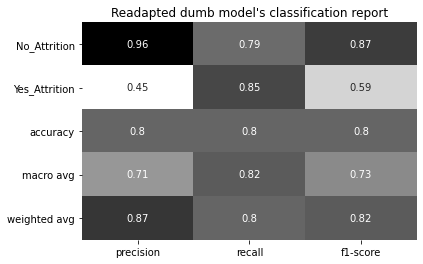

Confusion matrix, without normalization
[[574 156]
 [ 23 130]]


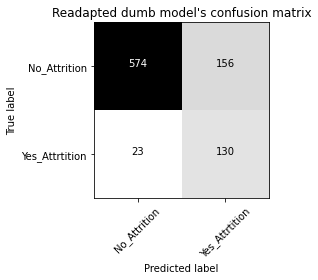

Normalized confusion matrix
[[0.78630137 0.21369863]
 [0.1503268  0.8496732 ]]


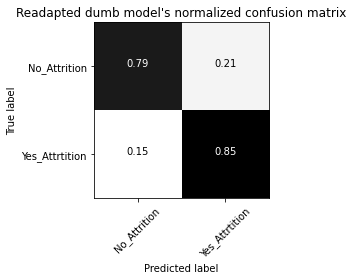

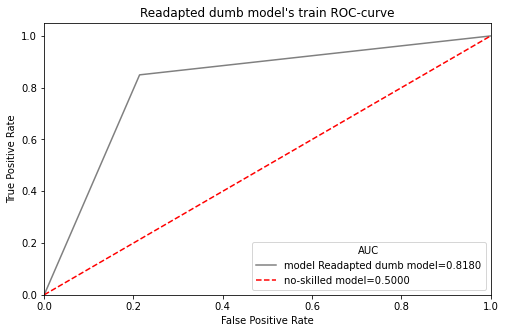

In [177]:
y_train = df_converted["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_converted)
plot_classification_report(y_train, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_train, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_train, y_pred, type_flag, color, models_global_info)

<h6> Test </h6>

<h6> Dumb model readapted </h6>

In [178]:
max_num_count_no = 3
model_name = "Readapted dumb model"
type_flag = "test"
cmap = plt.cm.Greys
color = "grey"

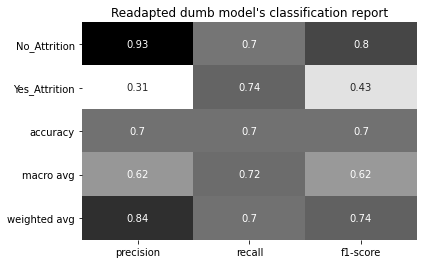

Confusion matrix, without normalization
[[129  56]
 [  9  25]]


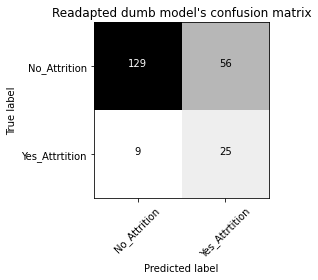

Normalized confusion matrix
[[0.6972973  0.3027027 ]
 [0.26470588 0.73529412]]


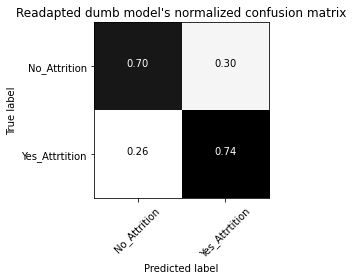

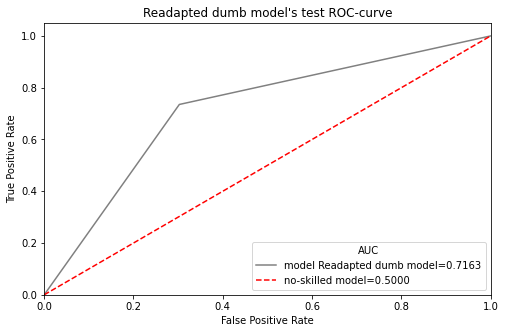

In [179]:
y_test = df_ts_conv["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_ts_conv)
plot_classification_report(y_test, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_test, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_test, y_pred, type_flag, color, models_global_info)

<h2> Train curves </h2>

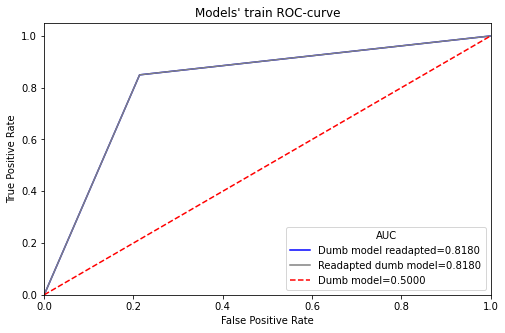

In [180]:
draw_multiple_roc_and_ap_curves("train", models_global_info)

<h2>Test curves </h2>

In [181]:
draw_multiple_roc_and_ap_curves("test", models_global_info)

KeyError: 'test'

<Figure size 576x360 with 0 Axes>

KeyError: 'test'

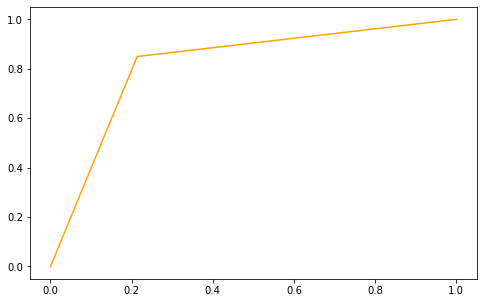

In [182]:
model_name = "Readapted dumb model"
plt.figure(figsize=(8, 5))
for type_flag in ["train", "test"]:
    for model_name in models_global_info.keys():
        if type_flag == "train":
            color = "orange"
        else:
            color = models_global_info[str(model_name)][type_flag]["color"]
        fpr = models_global_info[str(model_name)][type_flag]["fpr"]
        tpr = models_global_info[str(model_name)][type_flag]["tpr"]
        roc_auc = models_global_info[str(model_name)][type_flag]["roc"] 
    plt.plot(fpr, tpr, color=color, label='%s=%0.4f' % (model_name + " " + type_flag, roc_auc))
plt.plot([0, 1], [0, 1], 'k--', color="red", label='Dumb model=0.5000') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.tick_params(axis='both', which='major')
plt.legend(loc="lower right", title="AUC", frameon=True)
plt.title("%s's ROC-curves" % model_name)
plt.show()